In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import ydata_profiling
from ydata_profiling.utils.cache import cache_file 
from scipy import stats
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer

In [2]:
nba = pd.read_csv('nba_salaries.csv')

In [3]:
print(nba)

     Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0             0      Stephen Curry  48070014       PG   34      GSW  56  56   
1             1          John Wall  47345760       PG   32      LAC  34   3   
2             2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3             3       LeBron James  44474988       PF   38      LAL  55  54   
4             4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   
..          ...                ...       ...      ...  ...      ...  ..  ..   
462         462      Justin Minaya     35096       SF   23      POR   4   0   
463         463       Kobi Simmons     32795       SG   25      CHO   5   0   
464         464          Gabe York     32171       SG   29      IND   3   0   
465         465       RaiQuan Gray      5849       PF   23      BRK   1   0   
466         466      Jacob Gilyard      5849       PG   24      MEM   1   0   

       MP    FG  ...  ORB  DRB  TRB  AST  STL  BLK 

In [4]:
duplicates = nba['Salary'].duplicated()

In [5]:
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
462    False
463    False
464    False
465    False
466     True
Name: Salary, Length: 467, dtype: bool


In [6]:
idx = pd.IndexSlice
print(nba.iloc[idx[465:467, :]])

     Unnamed: 0    Player Name  Salary Position  Age Team  GP  GS    MP   FG  \
465         465   RaiQuan Gray    5849       PF   23  BRK   1   0  35.0  6.0   
466         466  Jacob Gilyard    5849       PG   24  MEM   1   0  41.0  1.0   

     ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  Player-additional  
465  ...  3.0  6.0  9.0  7.0  0.0  1.0  4.0  5.0  16.0           grayra01  
466  ...  0.0  4.0  4.0  7.0  3.0  0.0  2.0  3.0   3.0          gilyaja01  

[2 rows x 32 columns]


In [7]:
nba1 = nba.drop('Unnamed: 0', axis = 1)

In [8]:
print(nba1)

           Player Name    Salary Position  Age     Team  GP  GS    MP    FG  \
0        Stephen Curry  48070014       PG   34      GSW  56  56  34.7  10.0   
1            John Wall  47345760       PG   32      LAC  34   3  22.2   4.1   
2    Russell Westbrook  47080179       PG   34  LAL/LAC  73  24  29.1   5.9   
3         LeBron James  44474988       PF   38      LAL  55  54  35.5  11.1   
4         Kevin Durant  44119845       PF   34  BRK/PHO  47  47  35.6  10.3   
..                 ...       ...      ...  ...      ...  ..  ..   ...   ...   
462      Justin Minaya     35096       SF   23      POR   4   0  22.3   1.8   
463       Kobi Simmons     32795       SG   25      CHO   5   0   5.6   0.2   
464          Gabe York     32171       SG   29      IND   3   0  18.7   2.7   
465       RaiQuan Gray      5849       PF   23      BRK   1   0  35.0   6.0   
466      Jacob Gilyard      5849       PG   24      MEM   1   0  41.0   1.0   

      FGA  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  

In [9]:
nba2 = pd.DataFrame(nba1)

In [10]:
nba2

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,...,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,minayju01
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,...,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,simmoko01
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,...,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,yorkga01
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,...,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,grayra01


In [11]:
pd.set_option('display.max_columns', None)

In [12]:
nba2

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,0.304,0.8,3.0,0.250,1.0,2.8,0.364,0.370,0.0,0.3,0.000,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,minayju01
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,0.167,0.2,1.0,0.200,0.0,0.2,0.000,0.250,0.4,0.4,1.000,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,simmoko01
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,0.381,2.0,6.0,0.333,0.7,1.0,0.667,0.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,yorkga01
465,RaiQuan Gray,5849,PF,23,BRK,1,0,35.0,6.0,12.0,0.500,2.0,5.0,0.400,4.0,7.0,0.571,0.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,grayra01


In [13]:
na_values = nba2.isnull().values.any()

In [14]:
print(na_values)

True


In [15]:
na_values2 = nba2.isnull().sum()
na_values2

Player Name           0
Salary                0
Position              0
Age                   0
Team                  0
GP                    0
GS                    0
MP                    0
FG                    0
FGA                   0
FG%                   1
3P                    0
3PA                   0
3P%                  13
2P                    0
2PA                   0
2P%                   4
eFG%                  1
FT                    0
FTA                   0
FT%                  23
ORB                   0
DRB                   0
TRB                   0
AST                   0
STL                   0
BLK                   0
TOV                   0
PF                    0
PTS                   0
Player-additional     0
dtype: int64

In [16]:
nba3 = nba2.dropna()

In [17]:
nba3.isnull().sum()

Player Name          0
Salary               0
Position             0
Age                  0
Team                 0
GP                   0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                  0
2P                   0
2PA                  0
2P%                  0
eFG%                 0
FT                   0
FTA                  0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
Player-additional    0
dtype: int64

In [18]:
nba3.isna().sum()

Player Name          0
Salary               0
Position             0
Age                  0
Team                 0
GP                   0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                  0
3P                   0
3PA                  0
3P%                  0
2P                   0
2PA                  0
2P%                  0
eFG%                 0
FT                   0
FTA                  0
FT%                  0
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
Player-additional    0
dtype: int64

In [19]:
nba3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 0 to 465
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Player Name        433 non-null    object 
 1   Salary             433 non-null    int64  
 2   Position           433 non-null    object 
 3   Age                433 non-null    int64  
 4   Team               433 non-null    object 
 5   GP                 433 non-null    int64  
 6   GS                 433 non-null    int64  
 7   MP                 433 non-null    float64
 8   FG                 433 non-null    float64
 9   FGA                433 non-null    float64
 10  FG%                433 non-null    float64
 11  3P                 433 non-null    float64
 12  3PA                433 non-null    float64
 13  3P%                433 non-null    float64
 14  2P                 433 non-null    float64
 15  2PA                433 non-null    float64
 16  2P%                433 non-null

In [22]:
nba3.describe()

,Salary,Age,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,4.330000e+02,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,8.939026e+06,25.923788,50.796767,23.953811,20.757737,3.530023,7.503695,0.466005,1.060277,2.962356,0.327305,2.471594,4.542032,0.536607,0.536552,1.523095,1.950577,0.759570,0.882448,2.764434,3.645958,2.214781,0.631640,0.389145,1.165589,1.765358,9.637875
std,1.091468e+07,4.353714,23.109548,27.367487,9.038966,2.444566,4.995223,0.084056,0.879732,2.253925,0.122931,1.994832,3.590914,0.105161,0.074980,1.585882,1.913162,0.136201,0.721281,1.675886,2.221213,1.962699,0.375637,0.352370,0.826300,0.731754,6.878226
min,5.849000e+03,19.000000,1.000000,0.000000,2.800000,0.200000,1.000000,0.158000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.184000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,1.910860e+06,23.000000,35.000000,1.000000,13.400000,1.700000,3.700000,0.420000,0.400000,1.200000,0.297000,1.000000,1.900000,0.492000,0.498000,0.500000,0.700000,0.697000,0.400000,1.600000,2.100000,0.900000,0.300000,0.200000,0.600000,1.300000,4.700000
50%,4.124280e+06,25.000000,56.000000,9.000000,19.600000,2.800000,6.100000,0.455000,0.900000,2.500000,0.346000,1.800000,3.400000,0.537000,0.538000,0.900000,1.300000,0.769000,0.700000,2.400000,3.200000,1.400000,0.600000,0.300000,0.900000,1.700000,7.700000
75%,1.121526e+07,29.000000,69.000000,50.000000,28.600000,4.600000,9.800000,0.500000,1.600000,4.300000,0.387000,3.400000,6.100000,0.589000,0.575000,1.900000,2.500000,0.844000,1.100000,3.500000,4.500000,3.000000,0.800000,0.500000,1.500000,2.200000,12.500000
max,4.807001e+07,42.000000,83.000000,83.000000,37.400000,11.200000,22.200000,0.776000,4.900000,11.400000,1.000000,10.500000,17.800000,1.000000,0.857000,10.000000,12.300000,1.000000,5.100000,9.600000,12.500000,10.700000,2.200000,2.500000,4.100000,5.000000,33.100000


In [23]:
nba3

,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,0.493,4.9,11.4,0.427,5.1,8.8,0.579,0.614,4.6,5.0,0.915,0.7,5.4,6.1,6.3,0.9,0.4,3.2,2.1,29.4,curryst01
1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,0.408,1.0,3.2,0.303,3.1,6.7,0.459,0.457,2.3,3.3,0.681,0.4,2.3,2.7,5.2,0.8,0.4,2.4,1.7,11.4,walljo01
2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,0.436,1.2,3.9,0.311,4.7,9.7,0.487,0.481,2.8,4.3,0.656,1.2,4.6,5.8,7.5,1.0,0.5,3.5,2.2,15.9,westbru01
3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,0.500,2.2,6.9,0.321,8.9,15.3,0.580,0.549,4.6,5.9,0.768,1.2,7.1,8.3,6.8,0.9,0.6,3.2,1.6,28.9,jamesle01
4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,0.560,2.0,4.9,0.404,8.3,13.4,0.617,0.614,6.5,7.1,0.919,0.4,6.3,6.7,5.0,0.7,1.4,3.3,2.1,29.1,duranke01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,Jay Scrubb,49719,SG,22,ORL,2,0,15.0,2.5,3.5,0.714,1.0,1.0,1.000,1.5,2.5,0.600,0.857,0.5,1.0,0.500,0.0,3.0,3.0,0.5,1.0,0.0,1.5,1.0,6.5,scrubja01
462,Justin Minaya,35096,SF,23,POR,4,0,22.3,1.8,5.8,0.304,0.8,3.0,0.250,1.0,2.8,0.364,0.370,0.0,0.3,0.000,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,minayju01
463,Kobi Simmons,32795,SG,25,CHO,5,0,5.6,0.2,1.2,0.167,0.2,1.0,0.200,0.0,0.2,0.000,0.250,0.4,0.4,1.000,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,simmoko01
464,Gabe York,32171,SG,29,IND,3,0,18.7,2.7,7.0,0.381,2.0,6.0,0.333,0.7,1.0,0.667,0.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,yorkga01


In [31]:
nba3 = nba3.drop('Player-additional', axis=1)

In [ ]:
#Lets first make a box plot of all the columns to find how many outliers we have outside the boxplot.

In [32]:
names = ['GP', 'GS', 'MP', 'FG','FGA', 'FG%','3P', '3PA', '3P%','2P', '2PA', '2P%', 'eFG%','FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS']

In [33]:
nba1 = nba3.loc[:, names]

/Users/Brooks/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


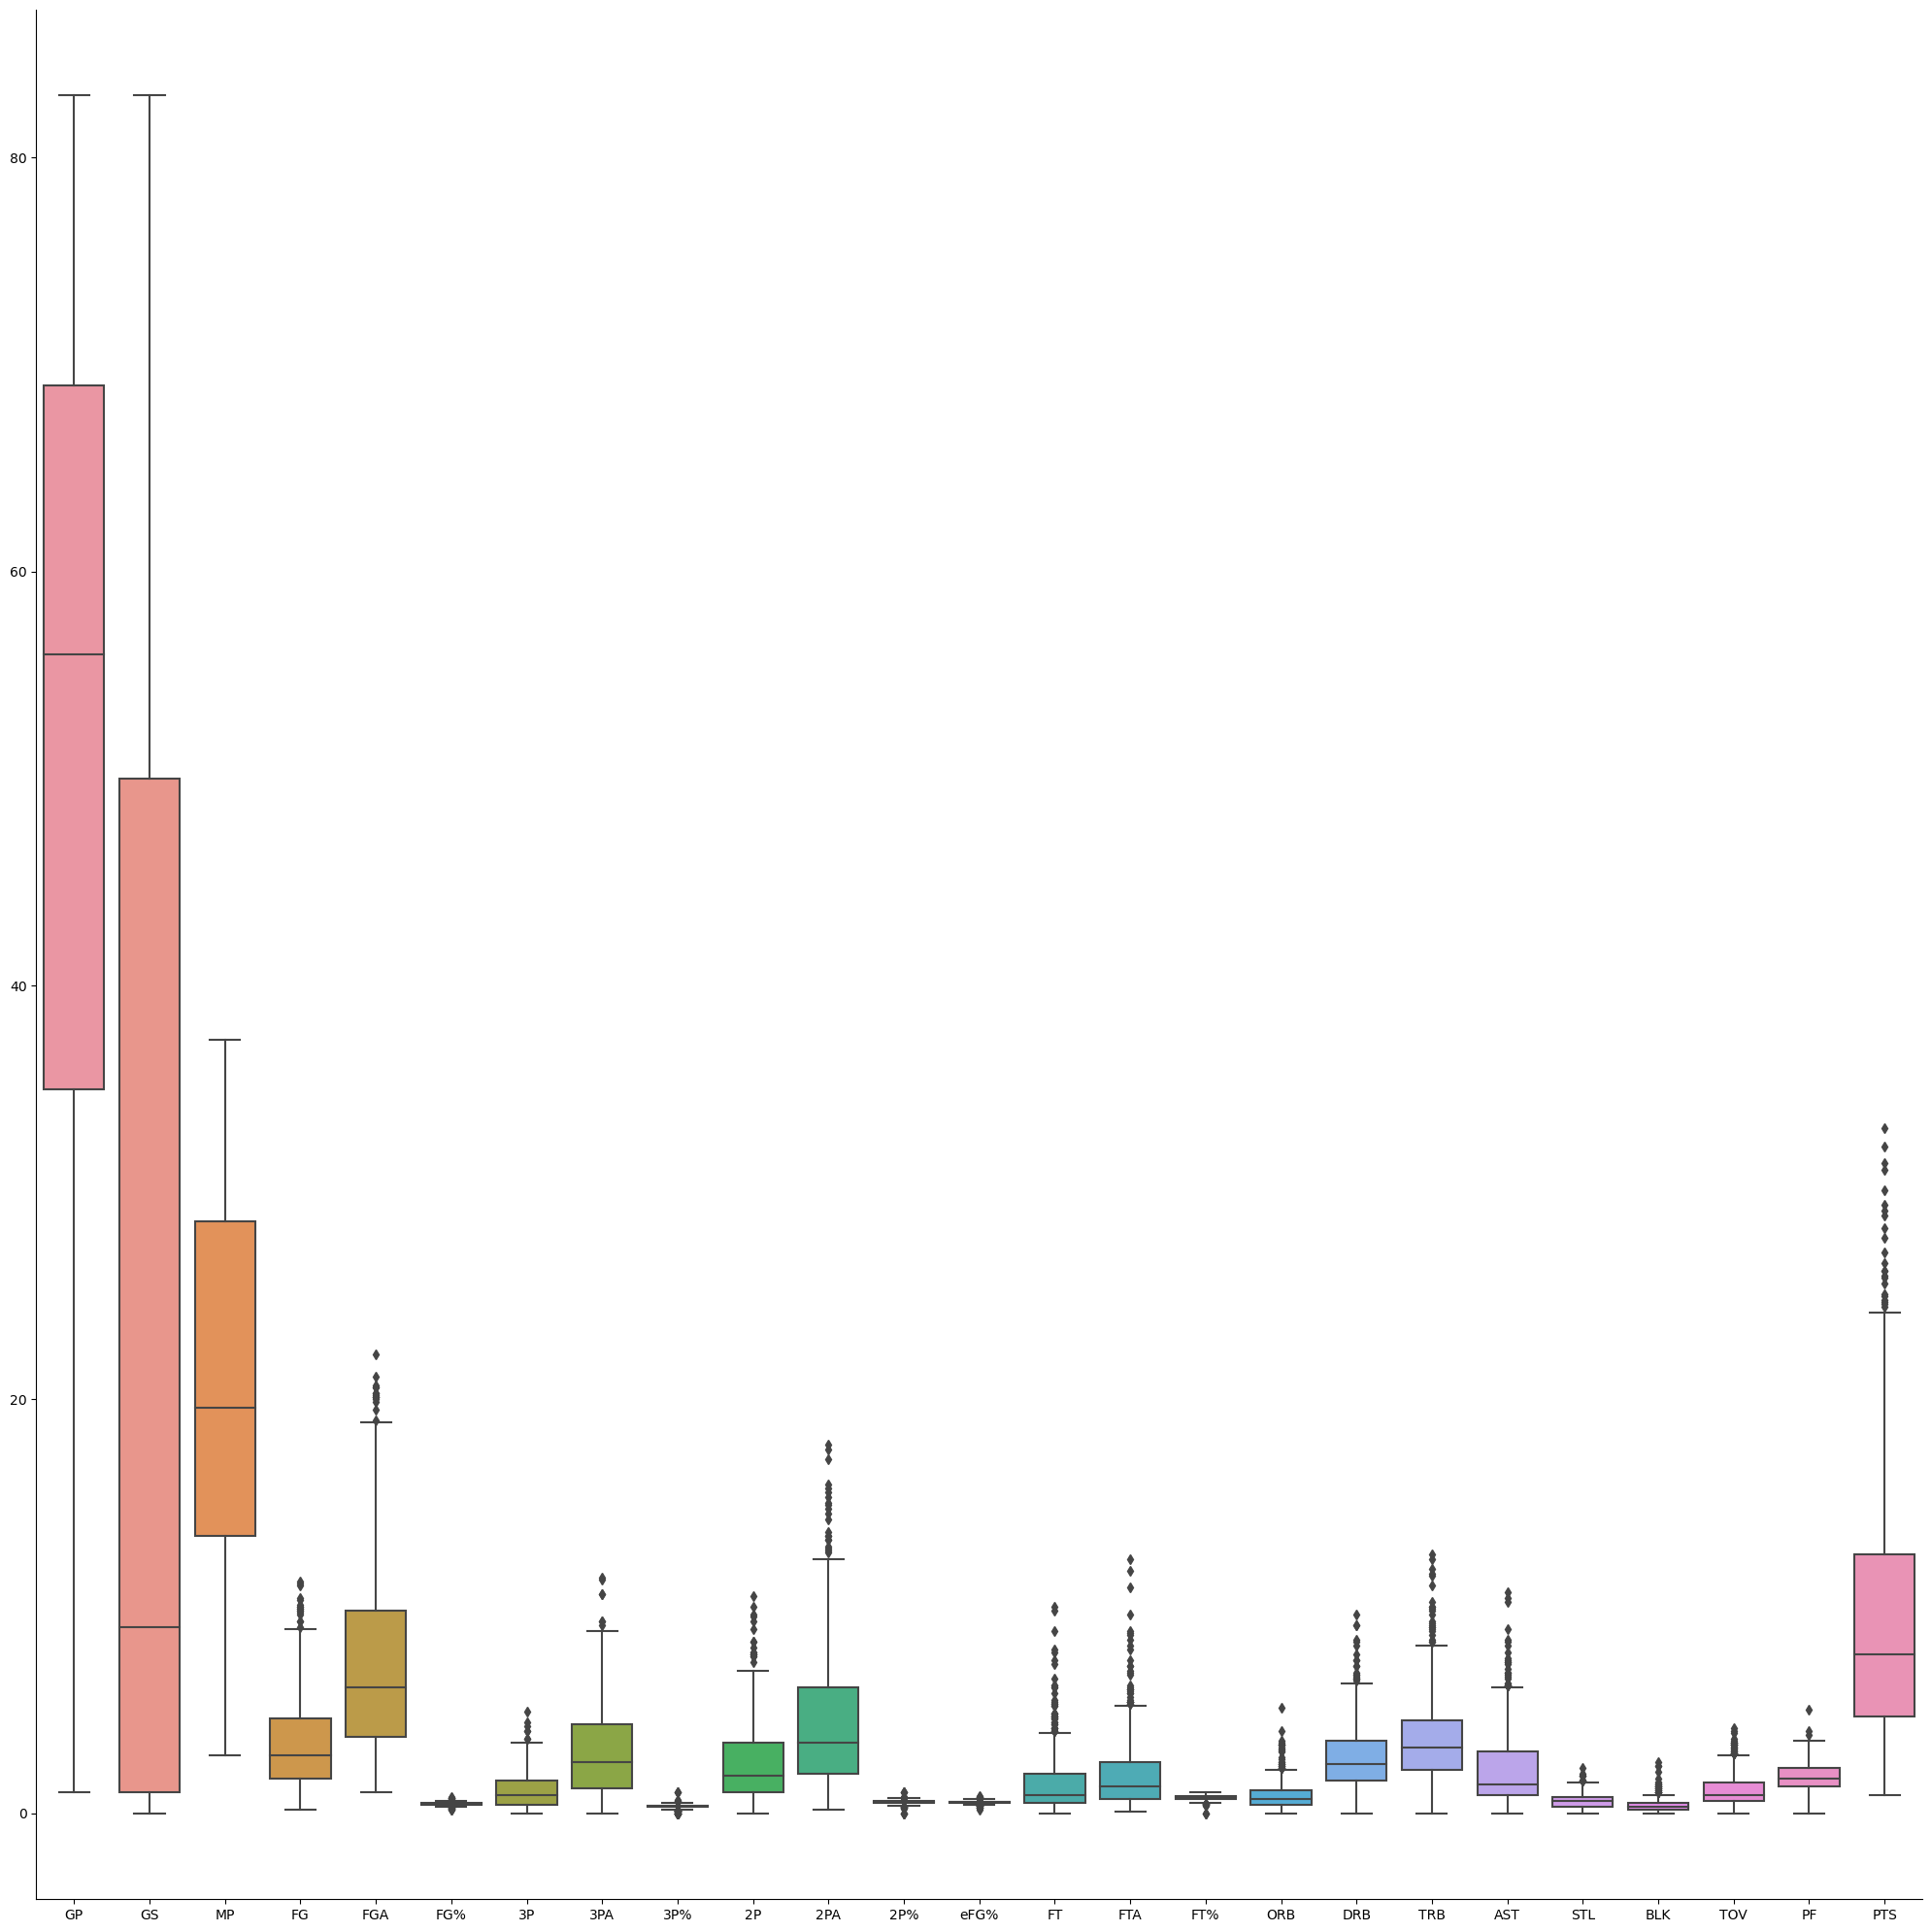

In [35]:
sns.catplot(nba1, kind='box', height= 20, aspect = 1)
plt.show()

In [ ]:
#Looks like we have a few outliers within our box plots. 
#Lets finally check the boxplot for salary since the values were so high and could not be incorporated into our original box plot

In [39]:
y = nba3['Salary']

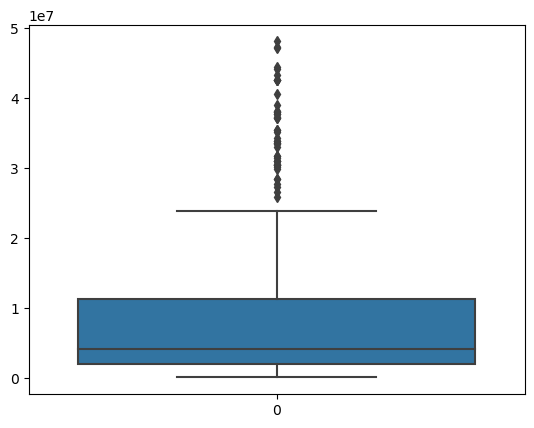

In [43]:
sns.boxplot(y)
plt.show()

In [ ]:
#From the boxplot of salary we can see that we have several outliers within our salary range.

In [ ]:
#Lets now make a heatmap of our data to try and find relationships within them.

In [ ]:
#We are going to be focused on the relationship between salary and stats, since we want to justify a players salary based on their stats.

In [46]:
names = ['Salary', 'GP', 'GS', 'MP', 'FG','FGA', 'FG%','3P', '3PA', '3P%','2P', '2PA', '2P%', 'eFG%','FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF','PTS']
nba4 = nba3.loc[:, names]
correlation_matrix = nba4.corr()

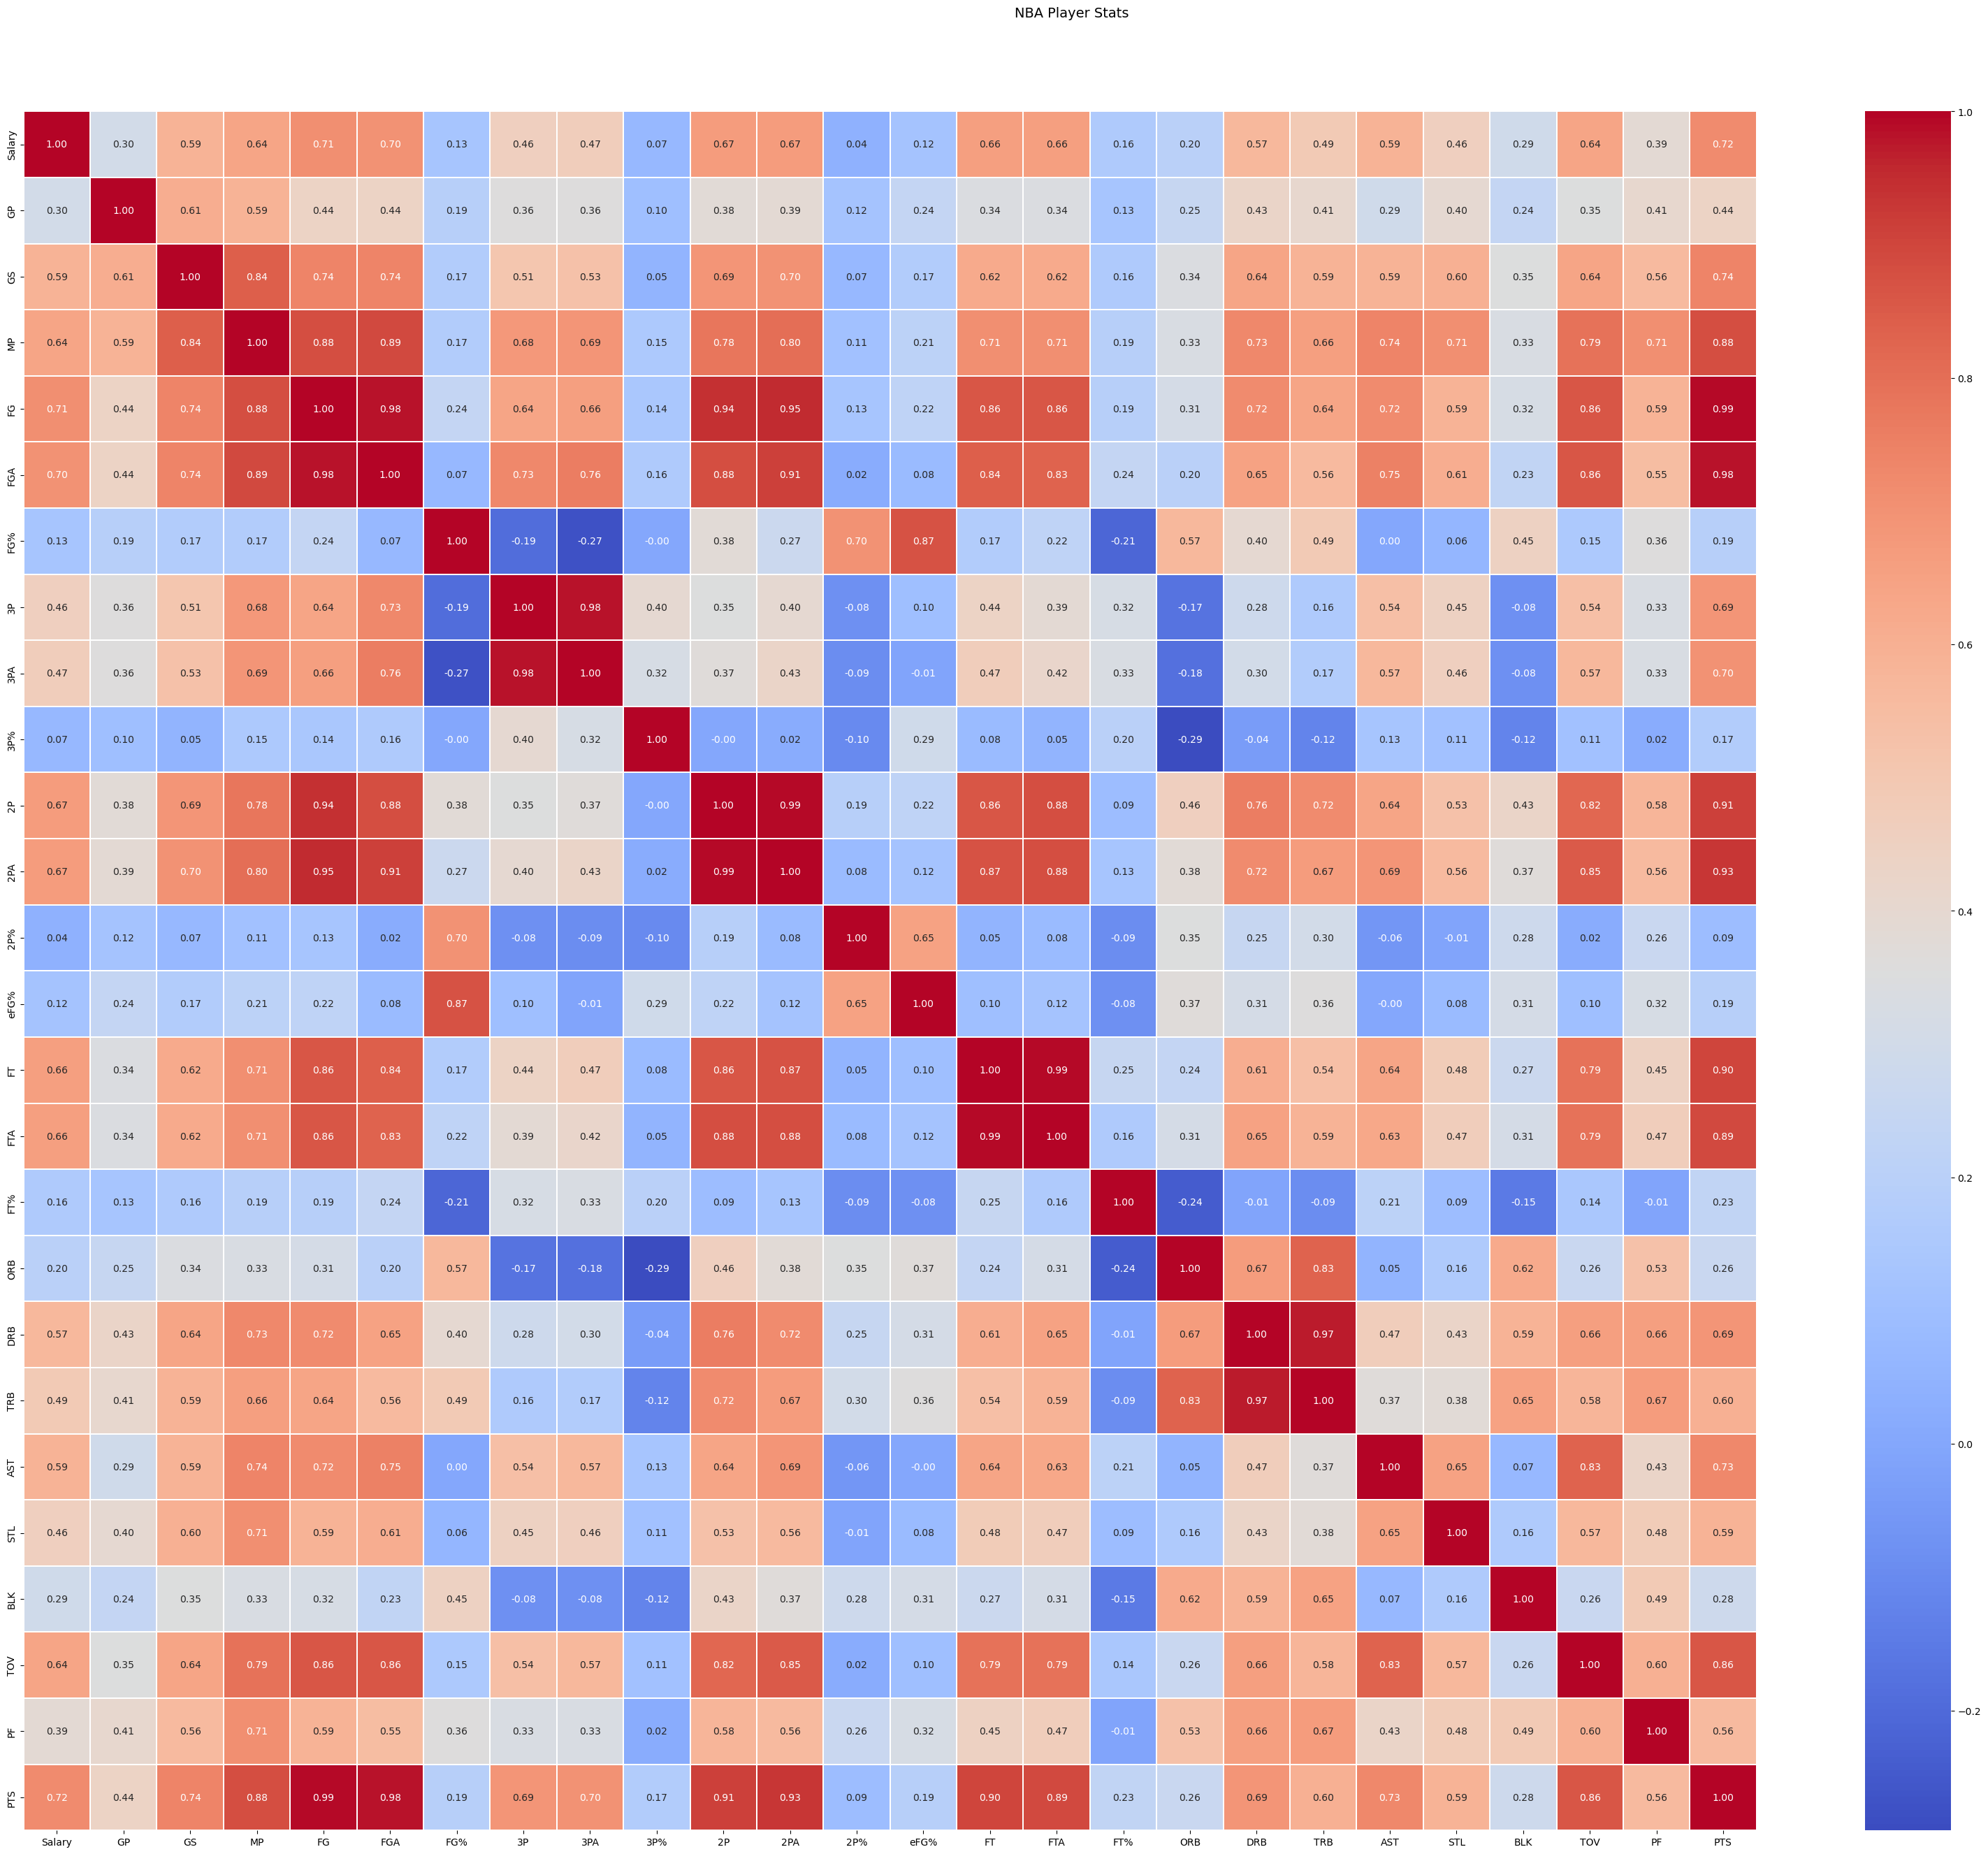

In [47]:
f, ax = plt.subplots(figsize=(40, 30))
hm = sns.heatmap(round(correlation_matrix,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.06)
f.subplots_adjust(top=0.93)
t= f.suptitle('NBA Player Stats', fontsize=14)

In [ ]:
#We can see from the heatmap that we have a few correlations related to salary which include: FG, FGA, PTS. Lets explore their relationship further below.

In [ ]:
# FG/Salary have a correlation of 0.71

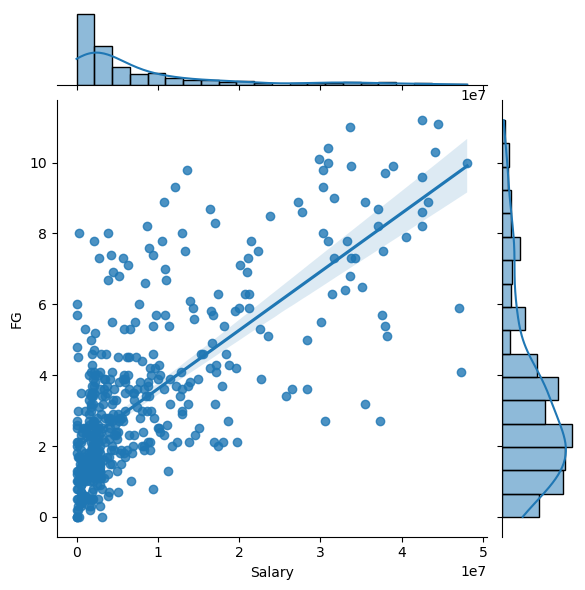

In [49]:
sns.jointplot(x='Salary', y='FG', data=nba, kind='reg')
plt.show()

In [ ]:
# FGA/Salary had a correlation of 0.70.

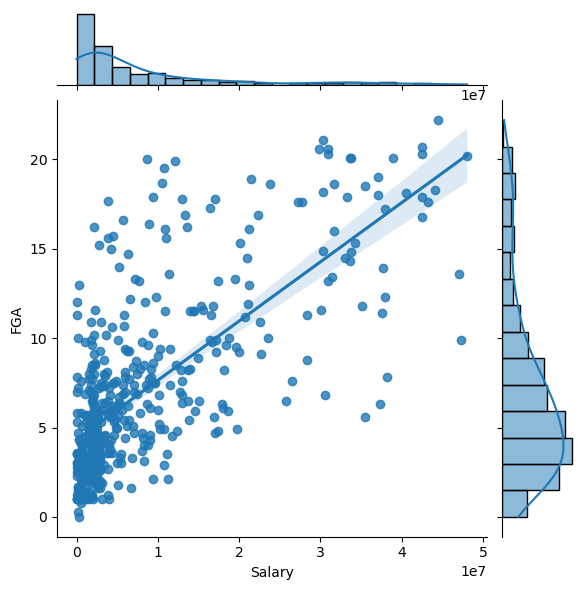

In [50]:
sns.jointplot(x='Salary', y='FGA', data=nba, kind="reg")
plt.show()

In [ ]:
#PTS and Salary had the highest correlation with a value of 0.72

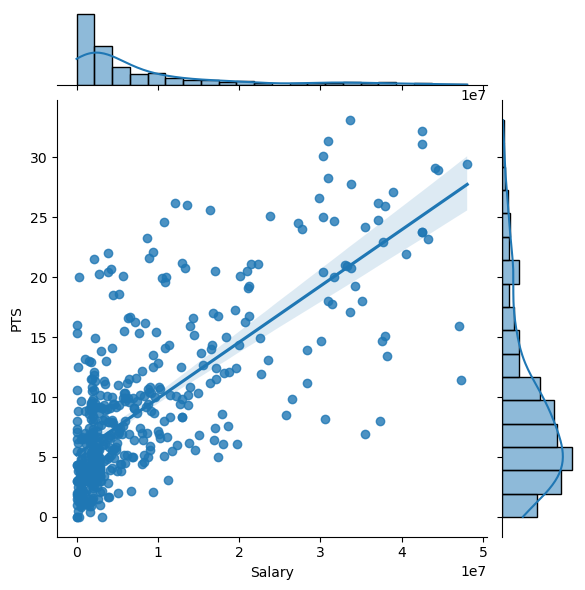

In [51]:
sns.jointplot(x='Salary', y='PTS', data=nba, kind="reg")
plt.show()

From the exploration of our data we can see that we have a few strong relationships within our data set between our independent variables (FG, FGA, and PTS), and our dependent variable (Salary). PTS was our strongest relationship within the data, which makes sense do to the fact that the more points a player scores, the more valualbe they would tend to be within the game.

In [ ]:
# We need to standardize our salary data since it is a continous data set that is not normally distributed. 
# First we will show its not normally distributed by plotting a histogram.

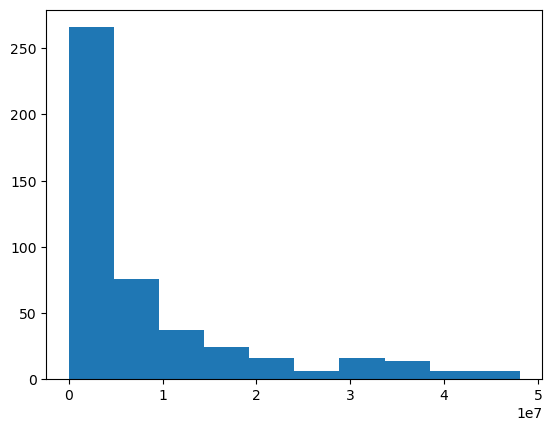

In [52]:
plt.hist(nba['Salary'])
plt.show()

In [ ]:
#We were correct in our assumption that our salary data is not normally distributed.
#Lets now use a log scale for our data by calling PowerTransformer.

In [65]:
log = PowerTransformer()

In [75]:
scaled_df = log.fit_transform(nba[['Salary']])

In [81]:
scaled_df = pd.DataFrame(scaled_df)

In [85]:
X = nba[['PTS']]
y= scaled_df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [88]:
X_train.shape, X_test.shape

((350, 1), (117, 1))